In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import plotly
from skimage import io
from skimage import morphology as morp
import plotly.express as px
import plotly.graph_objects as go

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


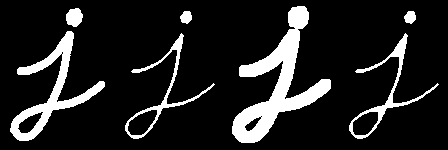

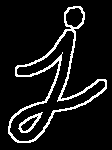

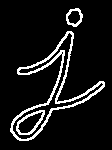

In [3]:
I = cv2.imread('/content/drive/My Drive/Image Processing/j.png', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((5,5),np.uint8)
erosion1 = cv2.erode(I,kernel,iterations = 1)
dilation = cv2.dilate(I,kernel,iterations = 1)
erosion2 = cv2.erode(dilation,kernel,iterations = 2)
cv2_imshow(np.hstack([I,erosion1,dilation,erosion2]))
cv2_imshow(dilation - I)
cv2_imshow(I - erosion1)

Write a script which reads 'coin.jpg' as input and outputs a new image containing:
Also count the number of coins in each case.

* only the coins touching the boundary of the image
* only the coins which overlap with each other. 
* only non-overlapping coins.


In [0]:
coins = cv2.imread('/content/drive/My Drive/Image Processing/coins.jpg', cv2.IMREAD_GRAYSCALE)
ret,coins = cv2.threshold(coins,127,255,cv2.THRESH_BINARY)
Height = coins.shape[0]
Width = coins.shape[1]
Radius = 9

In [0]:
def getCoinCount(img,r):
  h , w = img.shape[0],img.shape[1]
  flag = np.zeros((h,w))
  count=0
  for row in range(h):
    for col in range(w):
      if(img[row][col] >200):
        if(flag[row][col] == 0):
          count+=1
          # print ((row,col))
          flag[max(0,row-r):min(h,row+r),max(0,col-r):min(h,col+r)] = 1
  return count

#### only the coins touching the boundary of the image

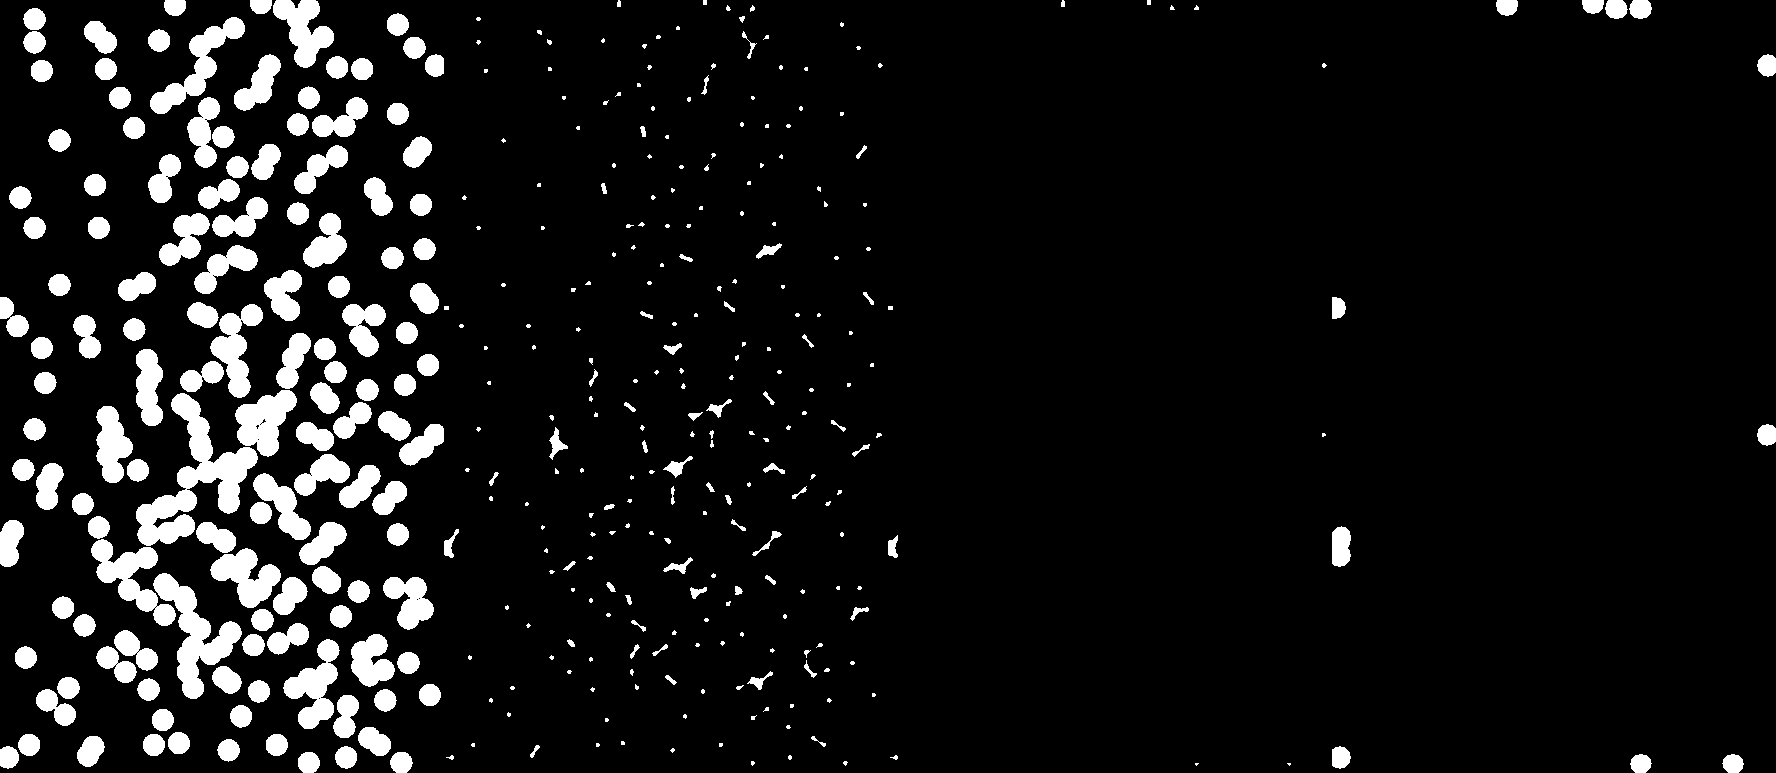

22


In [6]:
struct_ele = morp.disk(Radius)
erode = cv2.erode(coins,struct_ele)
boundary = erode.copy()
boundary[Radius+1:-Radius-1,Radius+1:-Radius-1] = 0
final = cv2.dilate(boundary,struct_ele)
cv2_imshow(np.hstack([coins,erode , boundary, final]))
count=0
for j in range(final.shape[1]):
  if final[0][j] != final[0][j-1]:
    count+=1
count1=0
for j in range(final.shape[0]):
  if final[j][0] != final[j-1][0]:
    count1+=1
count2=0
for j in range(final.shape[1]):
  if final[-1][j] != final[-1][j-1]:
    count2+=1
count3=0
for j in range(final.shape[0]):
  if final[j][-1] != final[j-1][-1]:
    count3+=1
print((count+count1+count2+count3))

#### only the coins which overlap with each other. 
#### only non-overlapping coins.

414


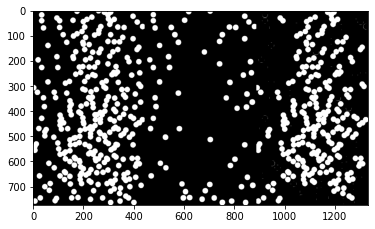

In [7]:
pad = 5
_r = Radius - 2
coin_mask = morp.disk(_r)
overlay = morp.disk(_r + pad)
overlay[pad:-pad, pad:-pad] += coin_mask
kernel = overlay.astype("int") - 1
non_over = cv2.morphologyEx(coins, cv2.MORPH_HITMISS, kernel)
non_over = cv2.dilate(non_over, morp.disk(Radius+2))
plt.imshow(np.hstack([coins, non_over , coins - non_over]),cmap="gray")
print(getCoinCount(non_over,Radius))

In [8]:
image = cv2.imread('/content/drive/My Drive/images/boy_smiling.jpg')
img_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
height, width , channels = img_rgb.shape
T = np.float32([[1,0,width/4],[0,1,height/4]])
print(T)

[[  1.    0.  100. ]
 [  0.    1.   98.5]]


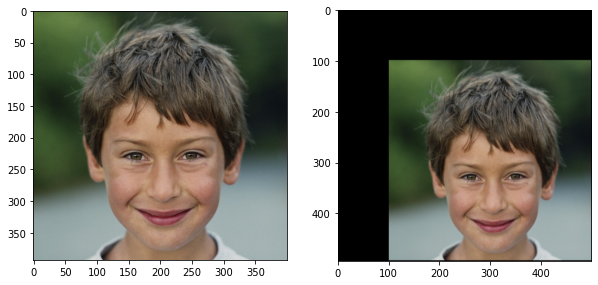

In [9]:
img_translate = cv2.warpAffine(img_rgb, T, (width+100,height+100))
fig , (ax1,ax2) = plt.subplots(1,2,figsize=[10,10])
ax1.imshow(img_rgb)
ax2.imshow(img_translate)
plt.show()

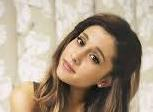

In [10]:
img = cv2.imread('/content/drive/My Drive/images/tilted_face.jpg')
cv2_imshow(img) 
left_eye =  (341, 325)
right_eye = (423, 331)

In [0]:
H = cv2.getRotationMatrix2D((0,0),45,1)
img_homo = cv2.warpAffine(img_rgb,H,(300,300))

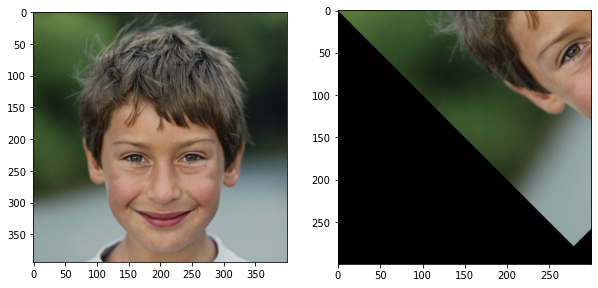

In [15]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=[10,10])
ax1.imshow(img_rgb)
ax2.imshow(img_homo)
plt.show()

In [0]:
coke = cv2.cvtColor(cv2.imread('/content/drive/My Drive/images/coca.jpg'),cv2.COLOR_BGR2RGB)
stadium = cv2.cvtColor(cv2.imread('/content/drive/My Drive/images/stadium.jpg'),cv2.COLOR_BGR2RGB)

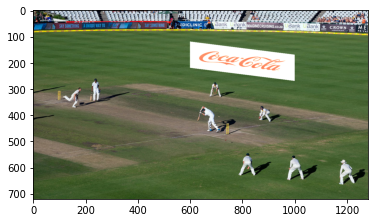

In [17]:
pts1 = np.float32([[0,0],[0,179],[320, 0],[320,179]]) # cola coords 
pts2 = np.float32([[600,120],[600, 220],[1000, 170],[1000, 270]])
H , status = cv2.findHomography(pts1,pts2)
img_homo = cv2.warpPerspective(coke,H,(stadium.shape[1],stadium.shape[0]))
# fig , (ax1,ax2) = plt.subplots(1,2,figsize=[10,10])
# ax1.imshow(coke)
# ax2.imshow(img_homo)
# plt.show()
final=cv2.add(stadium,img_homo)
plt.imshow(final)